In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

## Simple examples to illustrate aesthetic options

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 8, 50)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

Start with the default matplotlib image

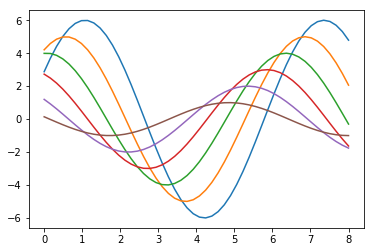

In [5]:
sinplot()

Now do the Seaborn default

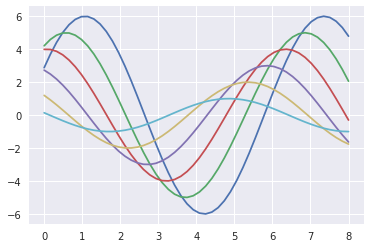

In [6]:
sns.set()
sinplot()

Lets see whats in the default style:

In [7]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

You can change these parameters

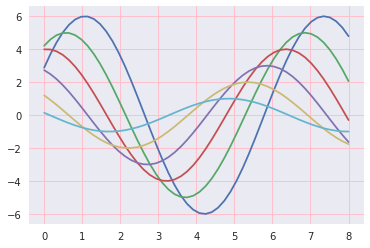

In [17]:
sns.set_style("darkgrid", {"grid.color": "pink"})
sinplot()

Size appropriately based on intended use.

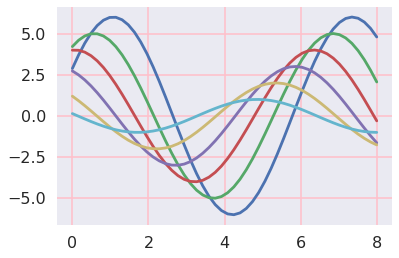

In [18]:
sns.set_context("poster")
sinplot()

## Simple Examples to Illustrate Visualization of distributions, regression etc

In [21]:
from scipy import stats, integrate

In [22]:
import pandas as pd

In [29]:
mean, cov = [1, 2], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [30]:
sns.set()

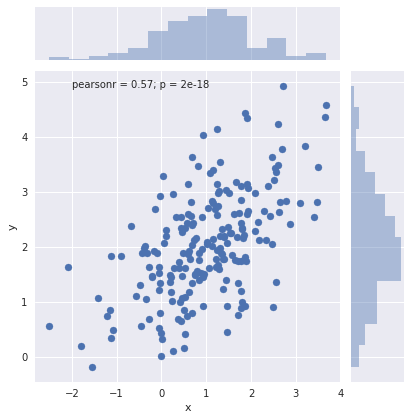

In [31]:
sns.jointplot(x="x", y="y", data=df);

The bivariate analogue of a histograms is a "hexbin" plot. An example follows:

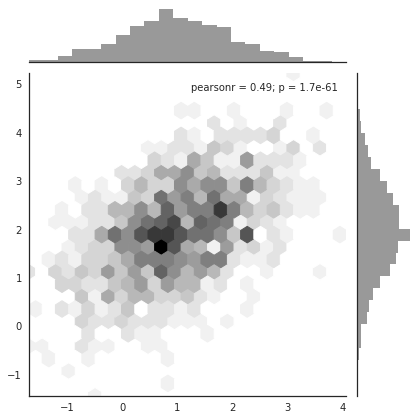

In [34]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

We can also show kernel density estimations as a contour plot

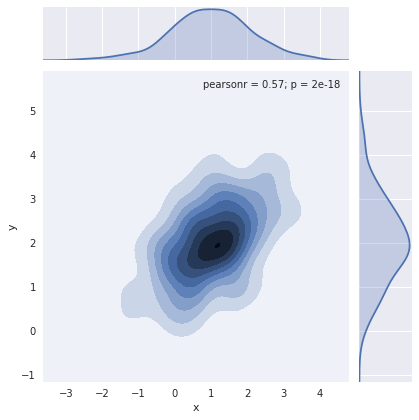

In [36]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

Seaborn has two functions, regplot() and lmplot() to draw linear regression models. Note that the intent is not do all the statistical analysis using Seaborn. The main goal is to make it easy to do data exploration with a statistical guide. Once some insight is obtained via such visualization, more quantitative studies should be done using other packages.

Lets load one of the datasets available as part of Seaborn:

In [37]:
accidents = sns.load_dataset("car_crashes")

In [44]:
list(accidents.columns.values)

['total',
 'speeding',
 'alcohol',
 'not_distracted',
 'no_previous',
 'ins_premium',
 'ins_losses',
 'abbrev']

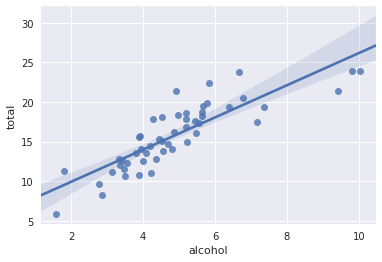

In [45]:
sns.regplot(x="alcohol", y="total", data=accidents);

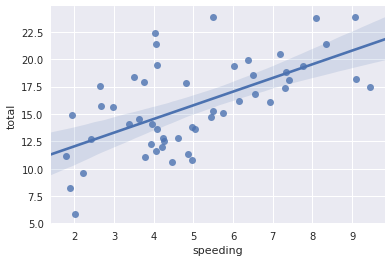

In [46]:
sns.regplot(x="speeding", y="total", data=accidents);

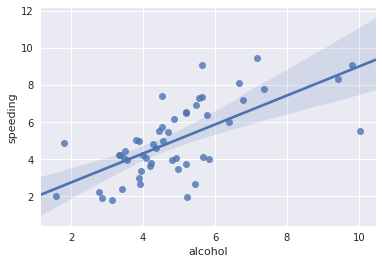

In [47]:
sns.regplot(x="alcohol", y="speeding", data=accidents);

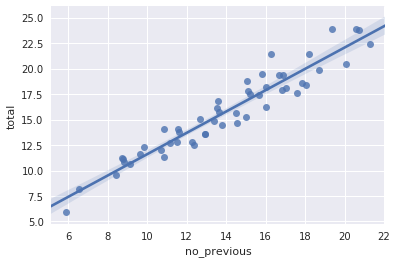

In [48]:
sns.regplot(x="no_previous", y="total", data=accidents);

Lets look at another dataset

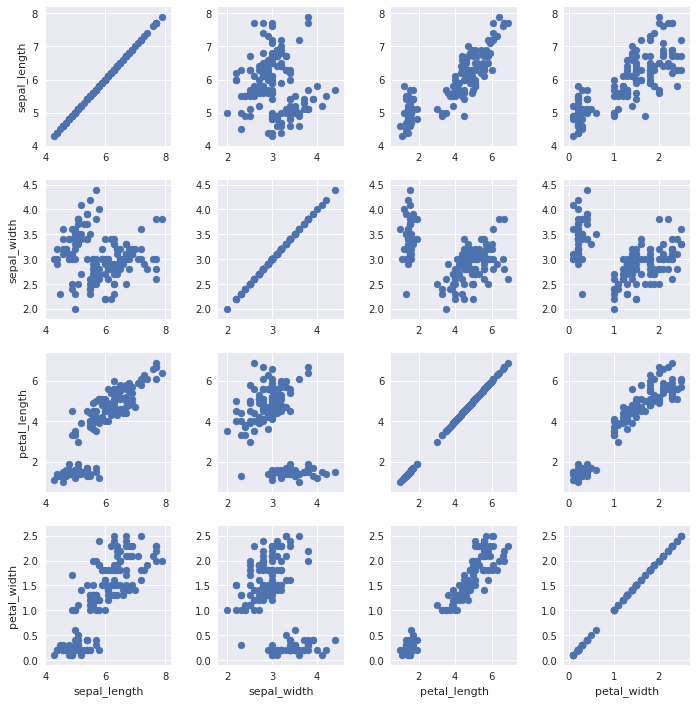

In [49]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

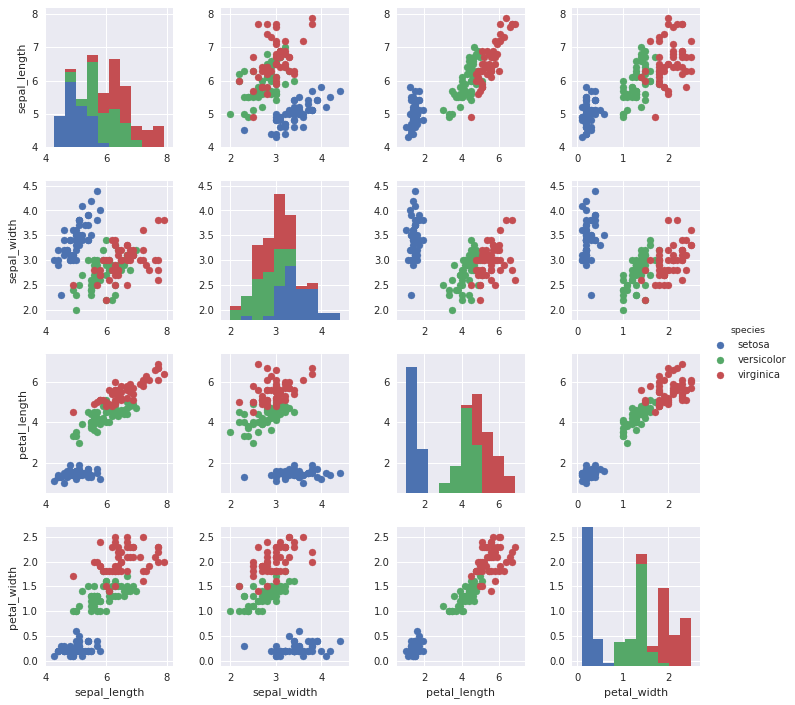

In [50]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();